In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df_train = pd.read_csv("C:/Users/shamr/Downloads/Data Science/Projects/Project 3 - Machine Learning/Housing Prices/train.csv", index_col = "Id")
df_test = pd.read_csv("C:/Users/shamr/Downloads/Data Science/Projects/Project 3 - Machine Learning/Housing Prices/test.csv", index_col = "Id")
df = pd.concat([df_train,df_test],axis=0)

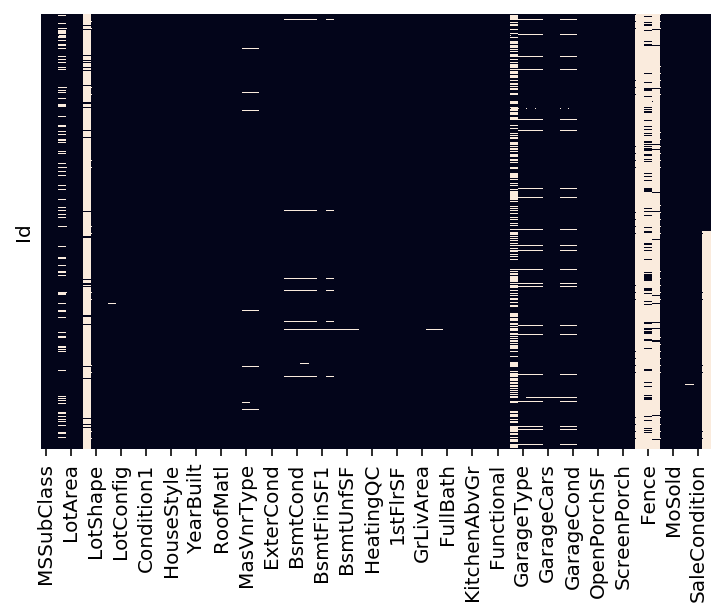

In [3]:
# plot columns with missingness
sns.heatmap(df.isnull(), yticklabels=False,cbar=False)
plt.savefig('missingness.png')

In [4]:
# fill NA values
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mode()[0])
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mode()[0])
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mode()[0])
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median())
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode()[0])
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])
df['GarageCars'] = df['GarageCars'].fillna(df['GarageCars'].mode()[0])
df['GarageArea'] = df['GarageArea'].fillna(df['GarageArea'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mode()[0])

In [5]:
# convert numerical data to categorical
df['MSSubClass'] = df.MSSubClass.apply(lambda x: str(x))
df['MoSold'] = df.MoSold.apply(lambda x: str(x))
df['YrSold'] = df.YrSold.apply(lambda x: str(x))
df['GarageYrBlt'] = df.GarageYrBlt.apply(lambda x: str(x))

In [6]:
# separate numerical and categorical data
num_data = df.select_dtypes(include = [np.number]).drop('SalePrice',axis=1)
cat_data = df.select_dtypes(exclude = [np.number])

num_features = num_data.columns
cat_features = cat_data.columns

print('There are {0} numerical and {1} categorical features'.format(num_data.shape[1], cat_data.shape[1]))

There are 32 numerical and 47 categorical features


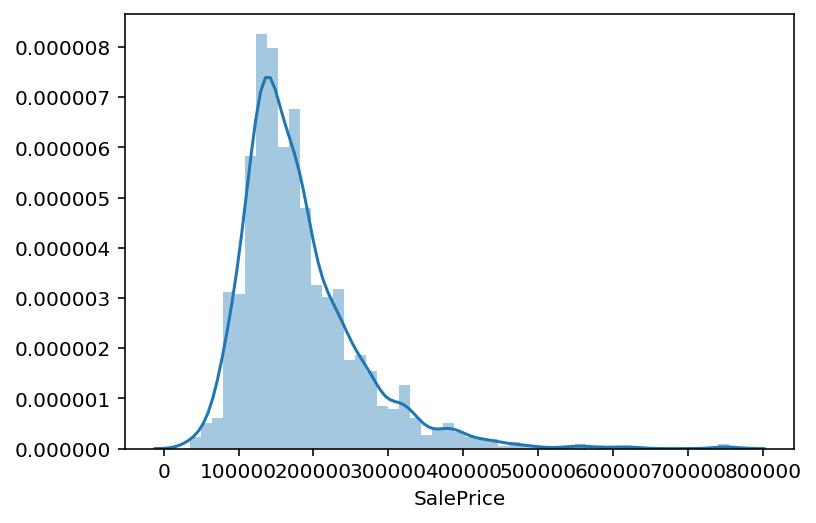

In [7]:
target = df['SalePrice']
sns.distplot(target)
plt.savefig('saleprice.png')

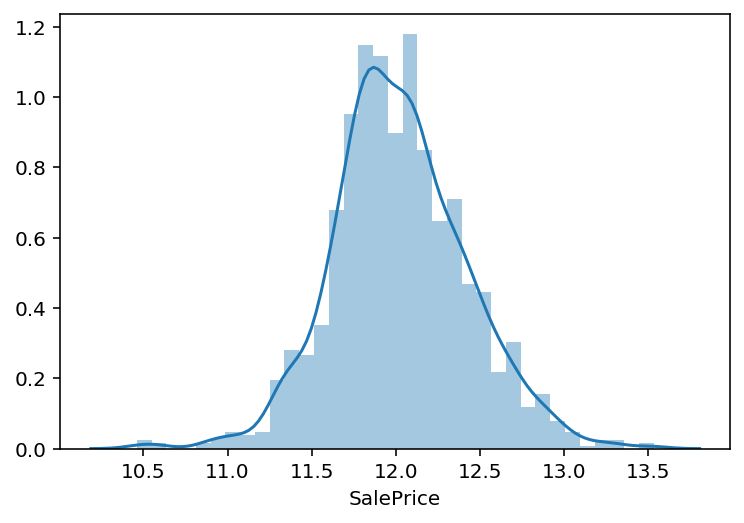

In [8]:
target2 = np.log(df['SalePrice'])
sns.distplot(target2)
plt.savefig('saleprice2.png')

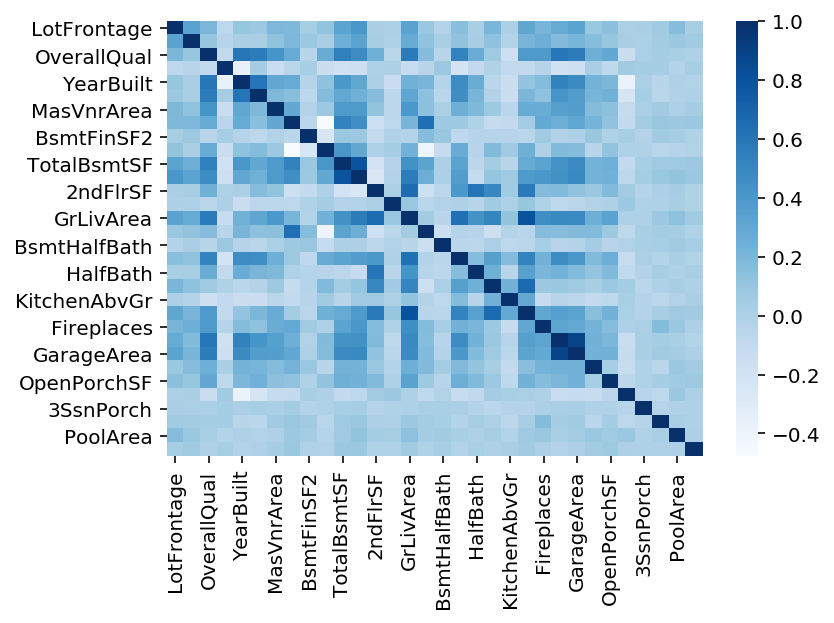

In [9]:
# plot correlation matrix
sns.heatmap(num_data.corr(), cmap = "Blues")
plt.savefig('cmhousing.png')

C:\Users\shamr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\shamr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\shamr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\shamr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\shamr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  wa

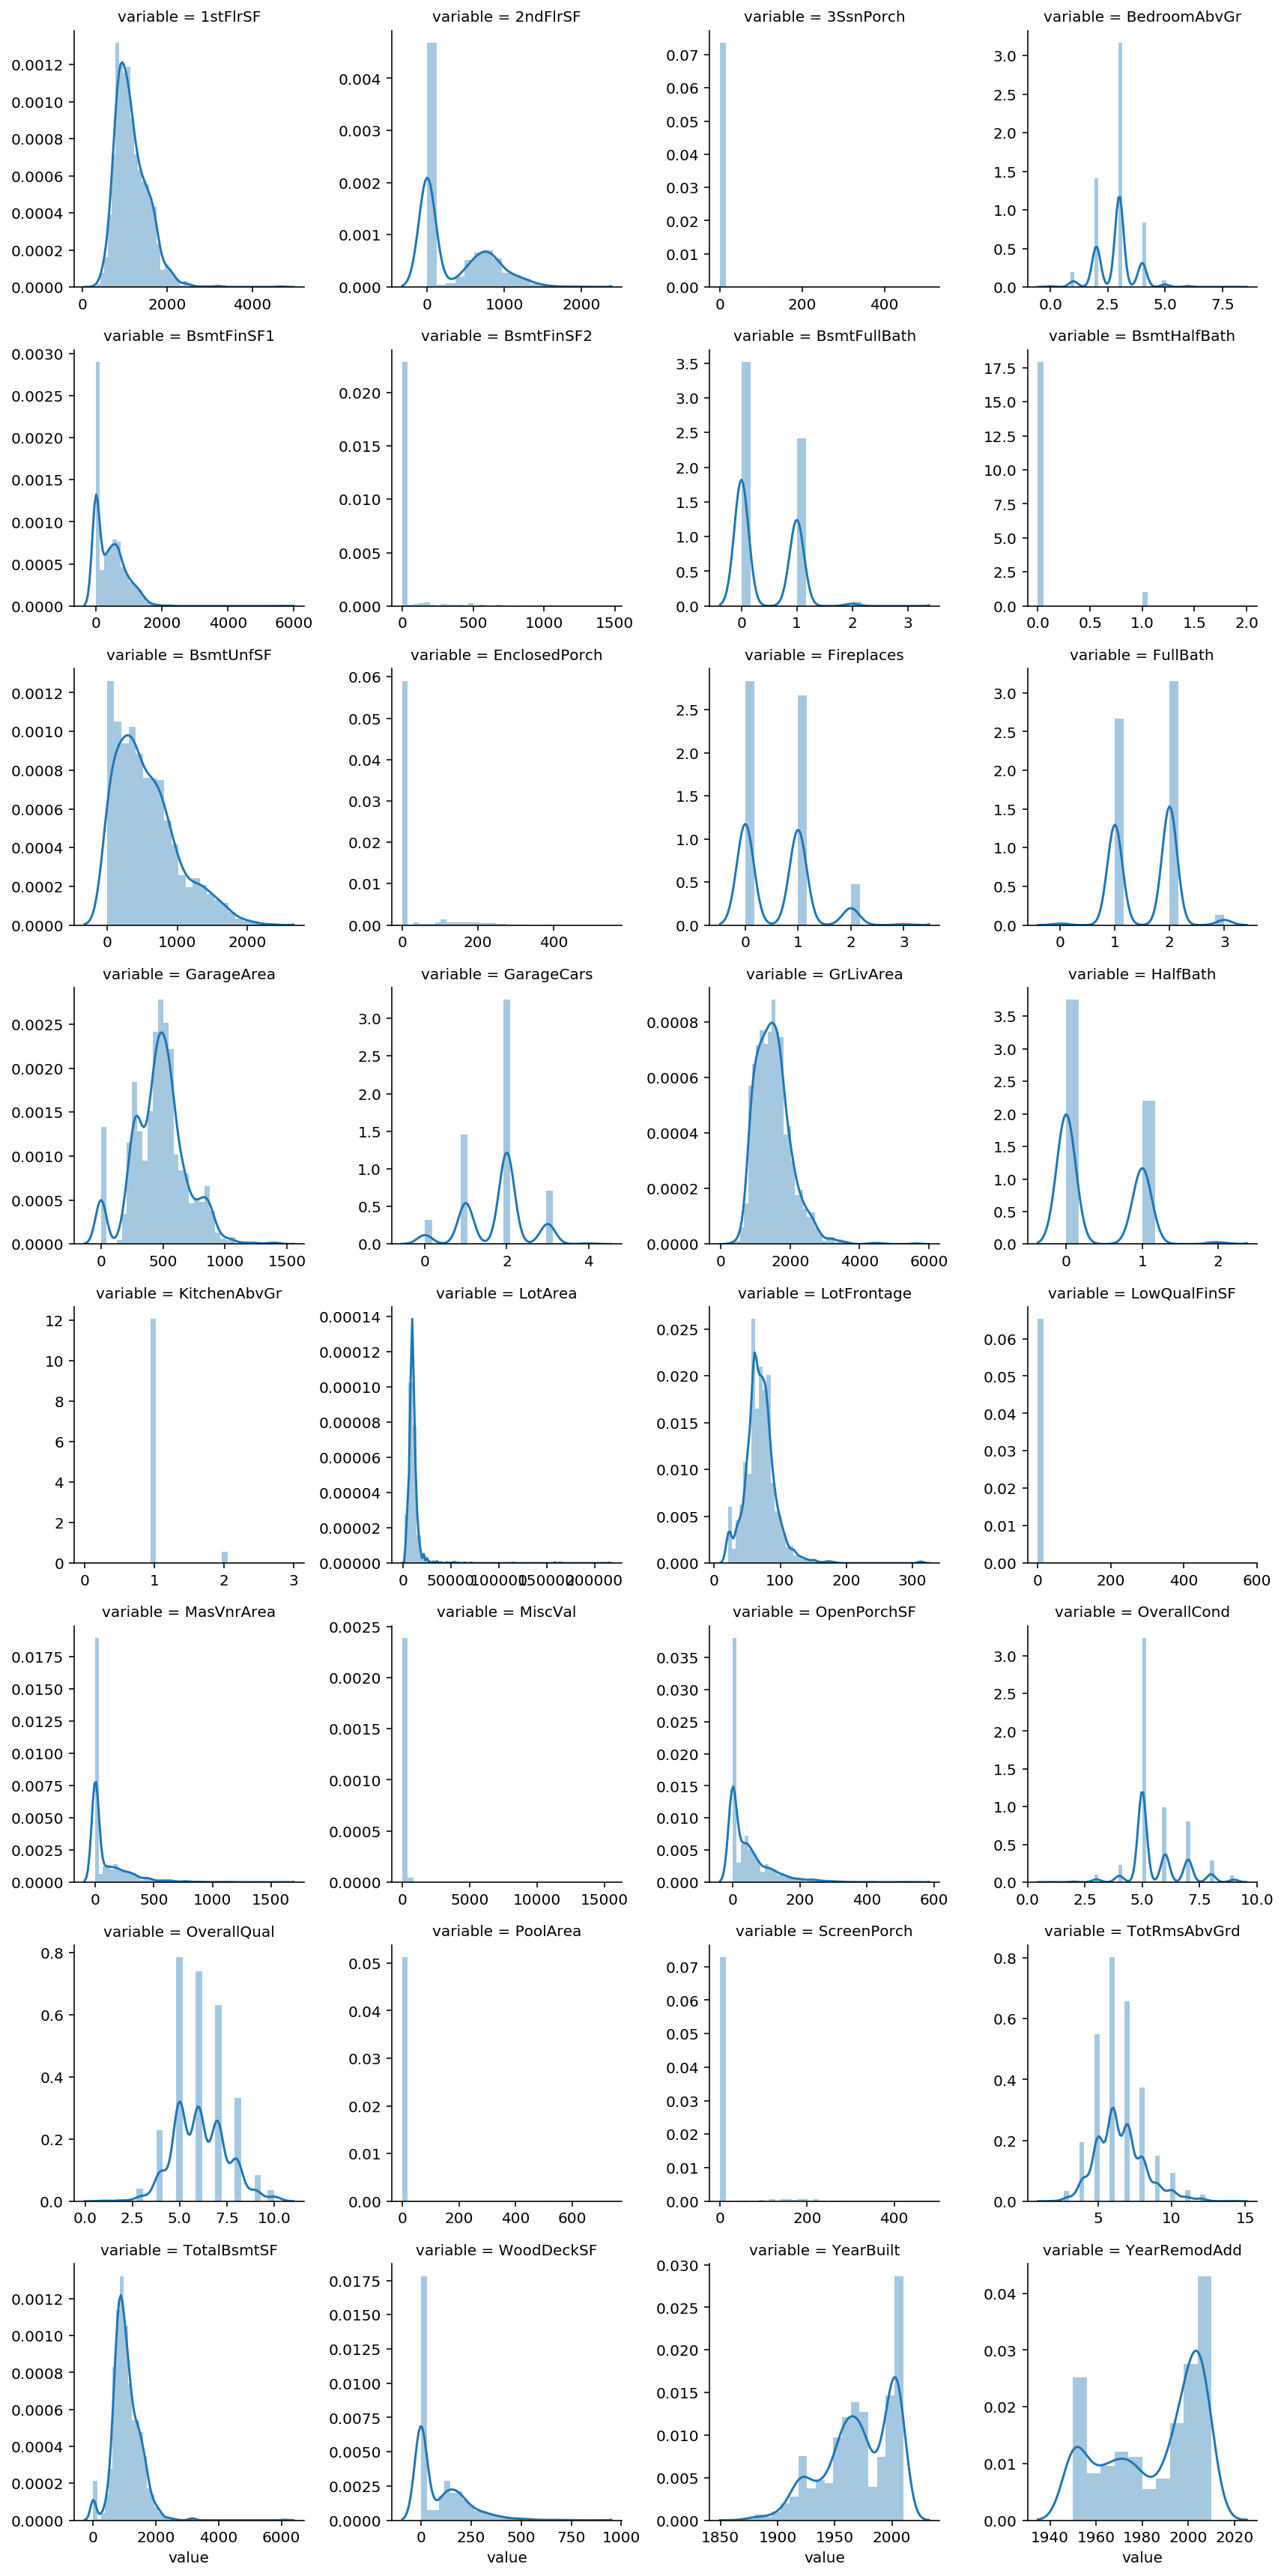

In [10]:
# plot numerical values 
f = pd.melt(df_train, value_vars = sorted(num_data))
g = sns.FacetGrid(f, col='variable', col_wrap = 4,sharex = False, sharey = False)
g = g.map(sns.distplot,'value')

C:\Users\shamr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


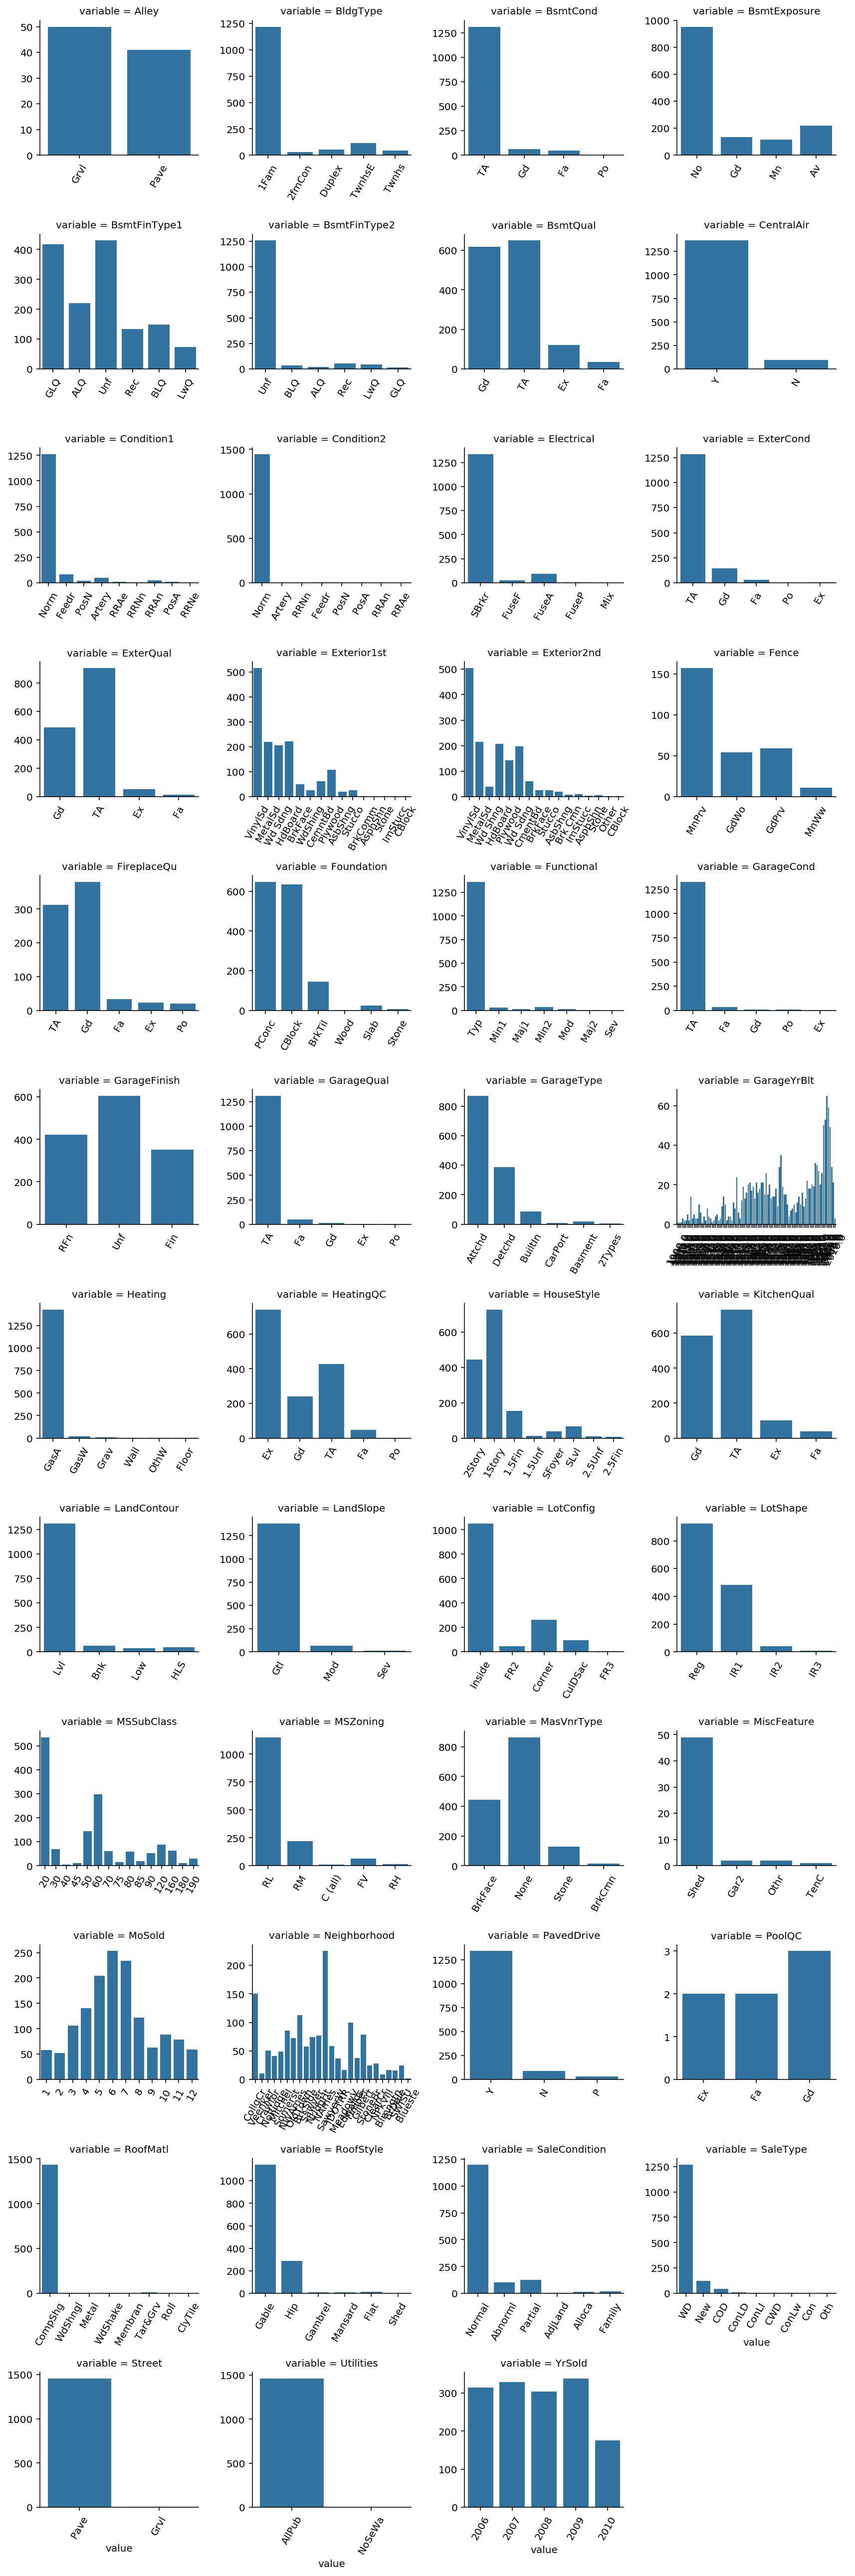

In [11]:
# plot categorical values
f = pd.melt(df_train, value_vars = sorted(cat_data))
g = sns.FacetGrid(f, col='variable', col_wrap = 4,sharex = False, sharey = False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot,'value')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

C:\Users\shamr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


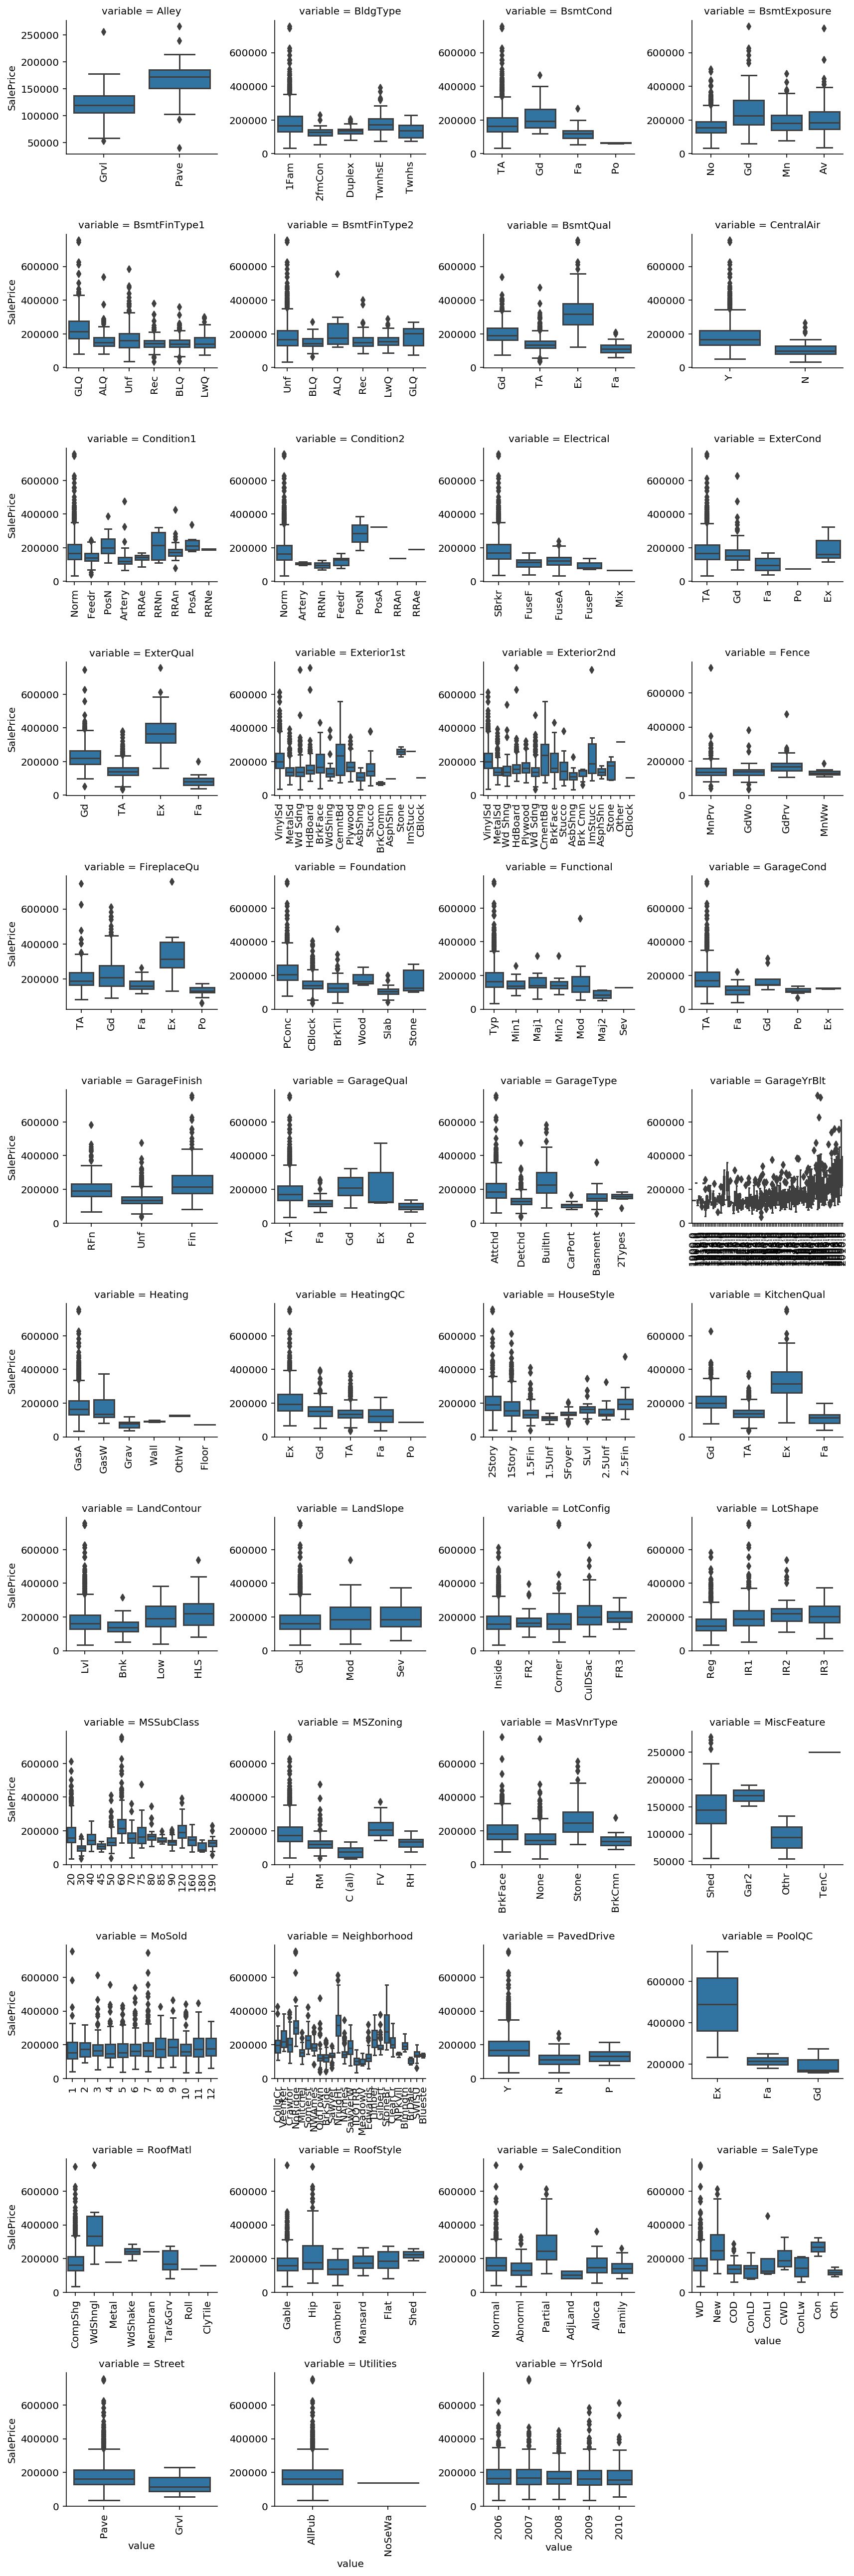

In [12]:
# boxplot categorical values
f = pd.melt(df_train, id_vars = ['SalePrice'], value_vars = sorted(cat_data))
g = sns.FacetGrid(f, col='variable', col_wrap = 4,sharex = False, sharey = False)
g = g.map(sns.boxplot,'value','SalePrice')
[plt.setp(ax.get_xticklabels(),rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

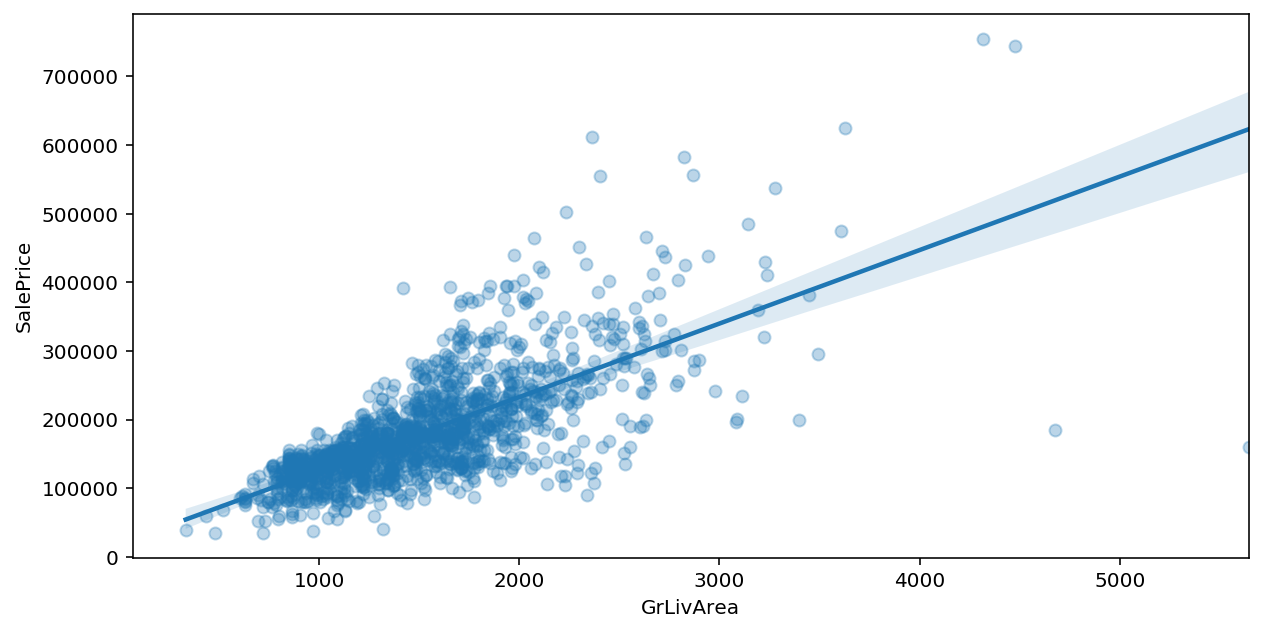

In [13]:
plt.figure(figsize=(10,5))
sns.regplot(df.GrLivArea,df.SalePrice,scatter_kws={'alpha':0.3})
plt.show()

In [14]:
# feature engineering
df['TotalSF'] = df.TotalBsmtSF + df.GrLivArea
df['TotalFloorSF'] = df['1stFlrSF'] + df['2ndFlrSF']
df['TotalPorchSF'] = df.OpenPorchSF + df.EnclosedPorch + df['3SsnPorch'] + df['ScreenPorch']

In [15]:
# fill NA values

Nan_Var = ['Alley',
           'BsmtQual',
           'BsmtCond',
           'BsmtExposure',
           'BsmtFinType1',
           'BsmtFinType2',
           'Fence',
           'FireplaceQu',
           'GarageType',
           'GarageFinish',
           'GarageQual',
           'GarageCond',
           'GarageYrBlt',
           'PoolQC',
           'MiscFeature']

df[Nan_Var] = df[Nan_Var].fillna('NotApplicable')

In [16]:
from sklearn.preprocessing import PowerTransformer

In [17]:
# normalize data
pt = PowerTransformer(method='yeo-johnson')
pt.fit(df[num_features])
df[num_features] = pt.transform(df[num_features])

C:\Users\shamr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\shamr\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [18]:
# one-hot encoding
df = pd.get_dummies(df)

## MODEL SELECTION
---

In [19]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

In [20]:
# unconcatenate dataset
df_train = df.iloc[:1460,:]
df_test = df.iloc[1460:,:]

In [21]:
# assign target and predictor variables
X = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice']
df_train.drop(['SalePrice'],axis=1).columns
df_test = df_test.drop(['SalePrice'], axis=1)

In [22]:
# create test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### RANDOM FOREST 

In [23]:
# create the instance of the model, fit it to the training data and create prediction
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [24]:
# evaluate performance
print('MAE: %f' % mean_absolute_error(rf_pred,y_test))

MAE: 15953.265365


#### RANDOM FOREST HYPERPARAMETER TUNING

In [25]:
# define parameters
param_grid = [{'n_estimators': [300, 500, 800],
               'max_depth': [5, 15, 25],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 5]}]

In [26]:
# create the instance of the model, fit it to the training data and create prediction
grid_search = GridSearchCV(rf,param_grid, scoring = 'neg_mean_absolute_error', cv=5, verbose=1, n_jobs=5)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   34.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  3.5min
[Parallel(n_jobs=5)]: Done 405 out of 405 | elapsed:  8.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [27]:
# retrieve best parameters
grid_search.best_params_

{'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}

In [28]:
# create the instance of the model, fit it to the training data and create prediction
rf_final = RandomForestRegressor(random_state = 42, max_depth = 15, min_samples_leaf = 2,min_samples_split=5, n_estimators = 300)
rf_final.fit(X_train,y_train)
rf_final_pred = rf_final.predict(X_test)

In [29]:
# evaluate performance
print('MAE: %f' % mean_absolute_error(rf_final_pred,y_test))

MAE: 16042.003570


#### XGBOOST

In [30]:
# create the instance of the model, fit it to the training data and create prediction
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)

In [31]:
# evaluate performance
print('MAE: %f' % mean_absolute_error(y_test,xgb_pred))

MAE: 17980.189025


#### XGBOOST HYPERPARAMTER TUNING 

In [32]:
# defining parameters
param_grid = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth': [2, 3, 5, 10, 15],
    'learning_rate':[0.05,0.1,0.15,0.20],
    'min_child_weight':[1,2,3,4],
    'booster': ['gbtree'],
    'base_score': [0.25,0.5,0.75,1]
    }

In [33]:
# instantiate grid search
random_cv = RandomizedSearchCV(estimator= xgb, param_distributions = param_grid, n_iter=50, scoring = 'neg_mean_absolute_error', cv=5, n_jobs = 5, verbose = 5, random_state=42)
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   23.5s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:  2.8min
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  7.8min
[Parallel(n_jobs=5)]: Done 250 out of 250 | elapsed: 13.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100,...
                   iid='deprecated', n_iter=50, n_jobs=5,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbt

In [34]:
# retrieve best parameters
random_cv.best_params_

{'n_estimators': 1100,
 'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.05,
 'booster': 'gbtree',
 'base_score': 0.25}

In [35]:
# create the instance of the model, fit it to the training data and create prediction
xgb_final = XGBRegressor(n_estimators = 1100, min_child_weight = 1, max_depth = 3, learning_rate = 0.05, booster = 'gbtree', base_score = 0.25)
xgb_final.fit(X_train,y_train)
xgb_final_pred = xgb_final.predict(X_test)

In [36]:
# evaluate performance
print('MAE: %f' % (mean_absolute_error(xgb_final_pred,y_test)))

MAE: 15415.196846


In [37]:
###FEATURE IMPORTANCE

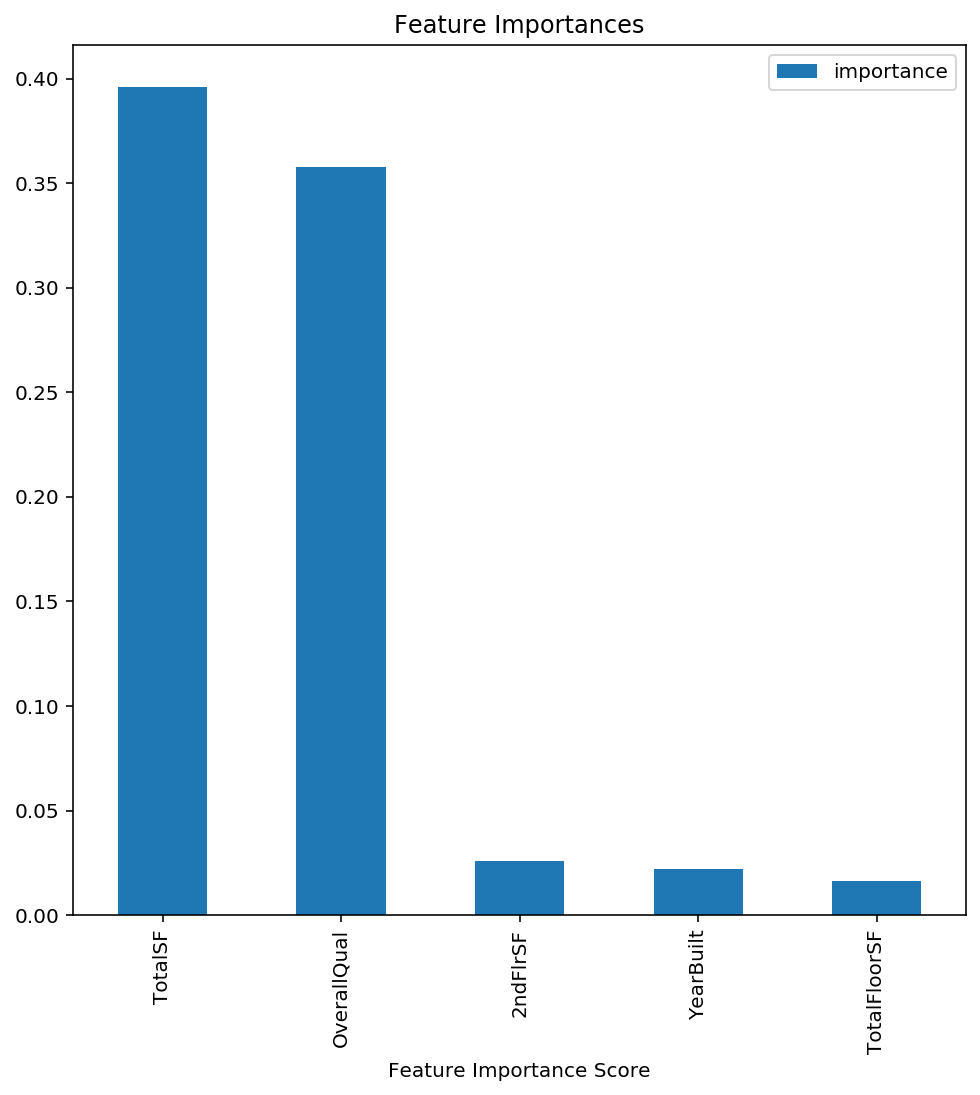

In [38]:
# plot important features
feat_imp = pd.DataFrame({'importance':rf_final.feature_importances_})    
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:5]
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.bar(title= "Feature Importances", figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.savefig("fi.png")